## 1. Generating a List of Flood Events from Copernicus



In [1]:
pip install git+https://github.com/spaceml-org/ml4floods#egg=ml4floods

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/spaceml-org/ml4floods to /tmp/pip-install-cn9huo12/ml4floods_75d24ff4b29849aa8acd262cd434f048
  Running command git clone -q https://github.com/spaceml-org/ml4floods /tmp/pip-install-cn9huo12/ml4floods_75d24ff4b29849aa8acd262cd434f048
     |████████████████████████████████| 700 kB 28.6 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.1 MB/s 
     |████████████████████████████████| 141 kB 58.8 MB/s 
     |████████████████████████████████| 16.7 MB 491 kB/s 
     |████████████████████████████████| 6.3 MB 60.0 MB/s 
     |████████████████████████████████| 419 kB 52.9 MB/s 
     |████████████████████████████████| 596 kB 58.7 MB/s 
     |████████████████████████████████| 5.8 MB 62.6 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
     |████████████████████████████████| 112 kB 65.7 MB/s 
 

In [2]:
import sys
import os

from ml4floods.data.copernicusEMS import activations
from ml4floods.data import utils
from pathlib import Path

In [3]:
table_activations_ems = activations.table_floods_ems(event_start_date="2021-01-01")
table_activations_ems

,Title,CodeDate,Type,Country
Code,,,,
EMSR586,"Flood in New South Wales, Australia",2022-07-03,Flood,Australia
EMSR577,Floods in Suriname,2022-03-07,Flood,Suriname
EMSR575,"Storm in Paderborn, Germany",2022-05-20,Storm,Germany
EMSR574,"Flood in Queensland, Australia",2022-05-13,Flood,Australia
EMSR572,Flood in Bosnia and Herzegovina,2022-04-01,Flood,Bosnia and Herze...
EMSR570,"Flood in New South Wales, Australia",2022-03-29,Flood,Australia
EMSR569,"Flood in Valencian Community, Spain",2022-03-21,Flood,Spain
EMSR568,Cyclone Gombe in Mozambique,2022-03-11,Flood,Mozambique
EMSR567,"Floods in Queensland, Australia",2022-02-26,Flood,Australia


##2. Building Floodmaps for a Specific Event


In [4]:
emsr_code = "EMSR501"
zip_files_activation_url_list = activations.fetch_zip_file_urls(emsr_code)
zip_files_activation_url_list

['https://emergency.copernicus.eu/mapping/download/184632/EMSR501_AOI01_DEL_MONIT02_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184615/EMSR501_AOI01_DEL_MONIT01_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/184606/EMSR501_AOI01_DEL_PRODUCT_r1_VECTORS_v1_vector.zip']

In [5]:
from tqdm import tqdm
import os
folder_out = f"Copernicus_EMS_raw"
os.makedirs(folder_out, exist_ok=True)

unzip_files_activation = []
for zip_file in tqdm(zip_files_activation_url_list):
    local_zip_file = activations.download_vector_cems(zip_file, 
                                                      folder_out=folder_out)
    unzipped_file = activations.unzip_copernicus_ems(local_zip_file,
                                                     folder_out=folder_out)
    unzip_files_activation.append(unzipped_file)

100%|██████████| 3/3 [00:16<00:00,  5.39s/it]


In [6]:
# folder_out=f"Copernicus_EMS_raw/{activation}"

code_date = table_activations_ems.loc[emsr_code]["CodeDate"]

registers = []
for unzip_folder in unzip_files_activation:
    metadata_floodmap = activations.filter_register_copernicusems(unzip_folder, code_date)
    if metadata_floodmap is not None:
        floodmap = activations.generate_floodmap(metadata_floodmap, folder_files=unzip_folder)
        registers.append({"metadata_floodmap": metadata_floodmap, "floodmap": floodmap})
        print(f"File {unzip_folder} processed correctly")
    else:
        print(f"File {unzip_folder} does not follow the expected format. It won't be processed")

File Copernicus_EMS_raw/EMSR501_AOI01_DEL_MONIT02_r1_VECTORS_v1_vector processed correctly
File Copernicus_EMS_raw/EMSR501_AOI01_DEL_MONIT01_r1_VECTORS_v1_vector processed correctly
File Copernicus_EMS_raw/EMSR501_AOI01_DEL_PRODUCT_r1_VECTORS_v1_vector processed correctly


In [7]:
floodmap.head()

,geometry,w_class,source
0,"POLYGON ((19.49257 42.09545, 19.49258 42.09541...",Flooded area,flood
1,"POLYGON ((19.51681 42.09338, 19.51681 42.09329...",Flooded area,flood
2,"POLYGON ((19.50074 42.09272, 19.50074 42.09263...",Flooded area,flood
3,"POLYGON ((19.50933 42.09266, 19.50933 42.09257...",Flooded area,flood
4,"POLYGON ((19.50763 42.09290, 19.50763 42.09281...",Flooded area,flood


In [8]:
import numpy as np
np.unique(floodmap.source)

array(['area_of_interest', 'flood', 'hydro', 'hydro_l'], dtype=object)

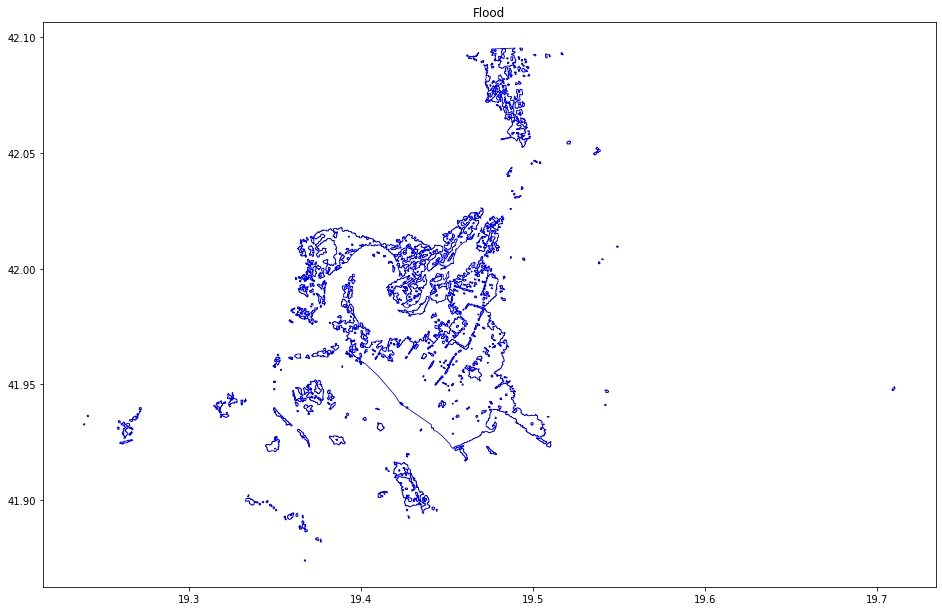

In [9]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] == "flood"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Flood"
)
plt.show()

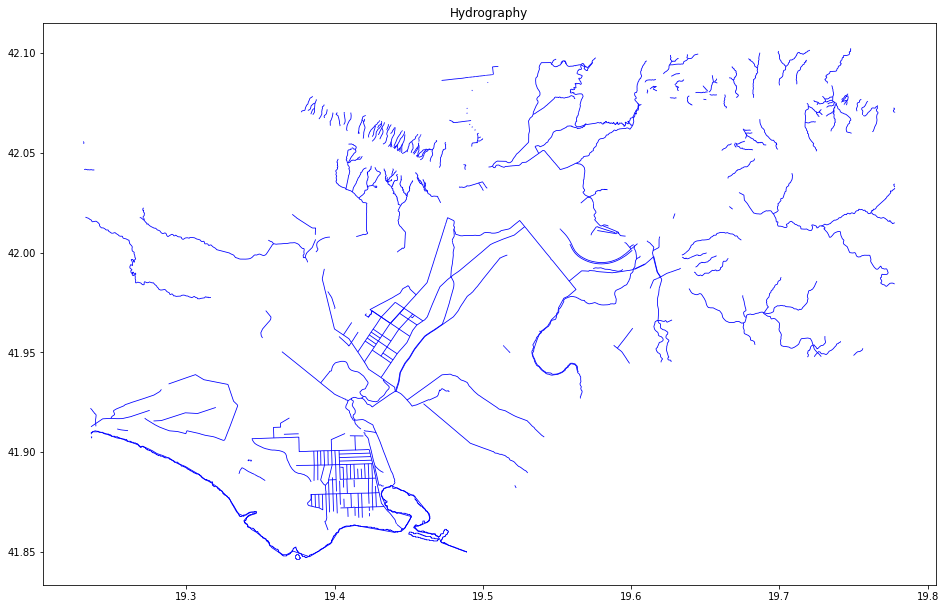

In [10]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] == "hydro_l"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Hydrography"
)
plt.show()

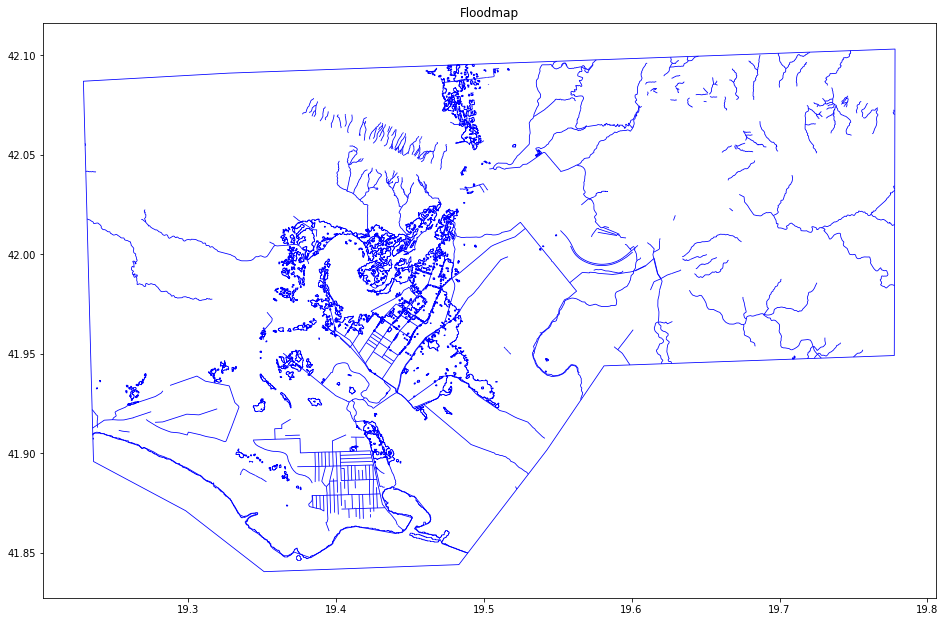

In [11]:
import matplotlib.pyplot as plt
# initialize figure
fig, ax = plt.subplots(figsize=(16,16))
floodmap[floodmap["source"] != "hydro"].plot(ax=ax, facecolor="None", edgecolor="blue", label="Flood Maps", linewidth=0.8)
ax.set(
    title="Floodmap"
)
plt.show()

In [12]:
metadata_floodmap

{'abstract': 'NaN',
 'aoi_code': 'AOI01',
 'area_of_interest_file': 'EMSR501_AOI01_DEL_PRODUCT_areaOfInterestA_r1_v1.shp',
 'area_of_interest_polygon': <shapely.geometry.polygon.Polygon at 0x7f9867829350>,
 'bounding box': {'east': 19.710555657000043,
  'north': 42.095451798000056,
  'south': 41.873487114000056,
  'west': 19.238301964000073},
 'country': 'NaN',
 'date_ems_code': datetime.datetime(2021, 1, 6, 0, 0, tzinfo=datetime.timezone.utc),
 'ems_code': 'EMSR501',
 'event id': 'EMSR501_AOI01_DEL_PRODUCT',
 'event type': 'Flash flood',
 'hydrology_file': 'EMSR501_AOI01_DEL_PRODUCT_hydrographyA_r1_v1.shp',
 'hydrology_file_l': 'EMSR501_AOI01_DEL_PRODUCT_hydrographyL_r1_v1.shp',
 'layer name': 'EMSR501_AOI01_DEL_PRODUCT_observedEventA_r1_v1',
 'observed_event_file': 'EMSR501_AOI01_DEL_PRODUCT_observedEventA_r1_v1.shp',
 'purpose': 'NaN',
 'reference system': 'epsg:4326',
 'satellite': 'Sentinel-1',
 'satellite date': Timestamp('2021-02-12 16:32:21+0000', tz='UTC'),
 'satellite_pre_eve

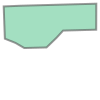

In [13]:
metadata_floodmap["area_of_interest_polygon"]

##3. Sentinel-2 and JRC Permanent Water Imagery Using Google Earth Engine

In [14]:
!pip install gcloud
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454 kB 24.5 MB/s 
  Created wheel for gcloud: filename=gcloud-0.18.3-py3-none-any.whl size=602937 sha256=12a0492cb15f879558685d58161a162457ab0981927261f5df50ed828248007c
  Stored in directory: /root/.cache/pip/wheels/50/9d/19/dc1a639905431252dbf8a61388a83459c5cfef7add445bebe4
Successfully built gcloud
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 30.3 MB/s 
     |████████████████████████████████| 3.0 MB 47.3 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
     |████████████████████████████████| 98 kB 10.3 MB/s 
     |████████████████████████████████| 130 kB 59.5 MB/s 
     |████████████████████████████████| 8.8 MB 43.5 MB/s 
     |████████████████████████████████| 99 kB 11.7 MB/s 
     |████████████████████████████████| 198 kB 75.5 MB/

In [15]:
from datetime import timedelta
from datetime import datetime
import geopandas as gpd
import pandas as pd
import ee
!earthengine authenticate


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=WKI8b17YOPXgSXJSXy7k9OGjxwRz9c0opOVqk8c4M3A&tc=cyZuHBsPqnd62b2u6xJINAZq28yK6BhFrVLtDb9DF4Y&cc=hNW4Kafvgemh0giwC2asrVpeEbUpqNNoxgXEN-toFhU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: Traceback (most recent call last):
  File "/usr/local/bin/earthengine", line 8, in <module>
  File "/usr/local/lib/python3.7/dist-packages/ee/cli/eecli.py", line 80, in main
    tf_module.app.run(_run_command, argv=sys.argv[:1])
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_pars

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geemap.eefolium as geemap
import folium
from ml4floods.data import ee_download, create_gt
from shapely.geometry import mapping

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
